In [1]:
# Imports all packages necessary or useful

import math
import statistics
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loads medical_raw_data csv

df = pd.read_csv(r"C:\Users\caleb\OneDrive\Desktop\WGU\D206 - Data Cleaning\medical_raw_data.csv")

In [3]:
# Profiles our data and gives us a snapshot of variables and associated data types in our data set
# We can appreciate 53 columns (including an unnamed placeholder value) and 10,000 observations for most variables

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10000 non-null  int64  
 1   CaseOrder           10000 non-null  int64  
 2   Customer_id         10000 non-null  object 
 3   Interaction         10000 non-null  object 
 4   UID                 10000 non-null  object 
 5   City                10000 non-null  object 
 6   State               10000 non-null  object 
 7   County              10000 non-null  object 
 8   Zip                 10000 non-null  int64  
 9   Lat                 10000 non-null  float64
 10  Lng                 10000 non-null  float64
 11  Population          10000 non-null  int64  
 12  Area                10000 non-null  object 
 13  Timezone            10000 non-null  object 
 14  Job                 10000 non-null  object 
 15  Children            7412 non-null   float64
 16  Age  

In [4]:
# Gives us a snapshot of values contained in each of our variables

pd.set_option("display.max_columns", 0)
df.head()

,Unnamed: 0,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,VitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1.0,53.0,"Some College, Less than 1 Year",Full Time,86575.93,Divorced,Male,No,17.802330,6,0,0,NaN,Emergency Admission,Yes,No,Medium,0.0,Yes,Yes,No,Yes,1.0,Yes,No,Yes,Blood Work,10.585770,3191.048774,17939.403420,3,3,2,2,4,3,3,4
1,2,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3.0,51.0,"Some College, 1 or More Years, No Degree",Full Time,46805.99,Married,Female,No,18.994640,4,2,1,No,Emergency Admission,Yes,No,High,1.0,No,No,No,No,NaN,No,Yes,No,Intravenous,15.129562,4214.905346,17612.998120,3,4,3,4,4,4,3,3
2,3,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3.0,53.0,"Some College, 1 or More Years, No Degree",Retired,14370.14,Widowed,Female,No,17.415889,4,1,0,No,Elective Admission,Yes,No,Medium,1.0,No,Yes,No,No,NaN,No,No,No,Blood Work,4.772177,2177.586768,17505.192460,2,4,4,4,3,4,3,3
3,4,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0.0,78.0,GED or Alternative Credential,Retired,39741.49,Married,Male,No,17.420079,4,1,0,No,Elective Admission,No,Yes,Medium,0.0,Yes,No,No,No,NaN,No,Yes,Yes,Blood Work,1.714879,2465.118965,12993.437350,3,5,5,3,4,5,5,5
4,5,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,NaN,22.0,Regular High School Diploma,Full Time,1209.56,Widowed,Female,No,16.870524,5,0,2,Yes,Elective Admission,No,No,Low,0.0,No,No,Yes,No,0.0,Yes,No,No,CT Scan,1.254807,1885.655137,3716.525786,2,1,3,3,5,3,4,3


In [5]:
# Quickly identifies duplicated values

df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [6]:
# Confirms all 10000 records are not duplicated as indicated by 10000 "False" values
# Return of "True" tells us a record is duplicated

print(df.duplicated().value_counts())

False    10000
dtype: int64


In [7]:
# Counts the sum of null variable values in our data set

df.isnull().sum()

Unnamed: 0               0
CaseOrder                0
Customer_id              0
Interaction              0
UID                      0
City                     0
State                    0
County                   0
Zip                      0
Lat                      0
Lng                      0
Population               0
Area                     0
Timezone                 0
Job                      0
Children              2588
Age                   2414
Education                0
Employment               0
Income                2464
Marital                  0
Gender                   0
ReAdmis                  0
VitD_levels              0
Doc_visits               0
Full_meals_eaten         0
VitD_supp                0
Soft_drink            2467
Initial_admin            0
HighBlood                0
Stroke                   0
Complication_risk        0
Overweight             982
Arthritis                0
Diabetes                 0
Hyperlipidemia           0
BackPain                 0
A

In [8]:
# We can see 7 variables that include missing values: Children, Age, Income, Soft_drink, Overweight, Anxiety, and Initial_days

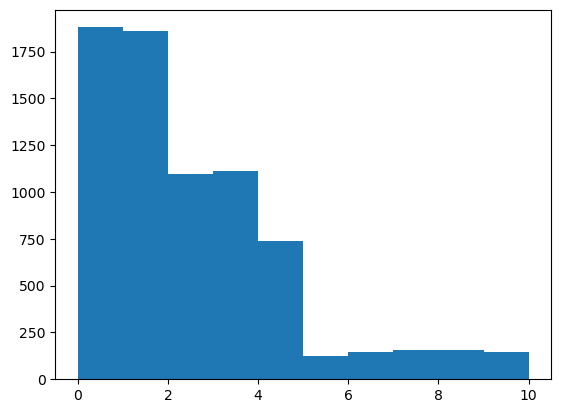

In [9]:
# Visualizes null values for 'Children' variable

plt.hist(df['Children'])
plt.show()

In [10]:
# Histogram is skewed right for number of children; we will replace missing values with median

df['Children'].fillna(df['Children'].median(), inplace=True)

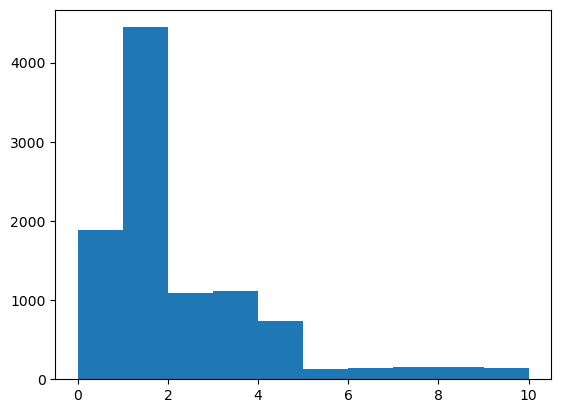

In [11]:
# Visualizes 'Children' following replacement of null values with median
# Distribution appears relatively similar, skewed right

plt.hist(df['Children'])
plt.show()

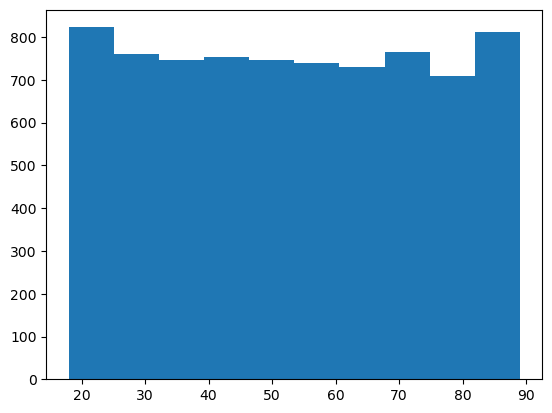

In [12]:
# Visualizes null values for 'Age' variable

plt.hist(df['Age'])
plt.show()

In [13]:
# This describes statistical characteristics of our 'Age' variable

df['Age'].describe()

count    7586.000000
mean       53.295676
std        20.659182
min        18.000000
25%        35.000000
50%        53.000000
75%        71.000000
max        89.000000
Name: Age, dtype: float64

In [14]:
# Histogram is distrubuted normally for ['Age']; we will replace missing values with mean

df['Age'].fillna(df['Age'].mean(), inplace=True)

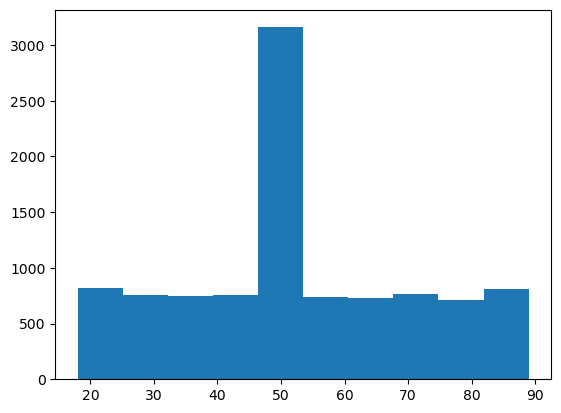

In [15]:
# Visualizes 'Age' following replacement of null values with mean
# Distribution appears to be have spiked at the mean - we can attribute this spike directly to replacement of 2414 null values with the variable mean

plt.hist(df['Age'])
plt.show()

In [16]:
# We can identify that our change in distribution has not affected our mean value

df['Age'].describe()

count    10000.000000
mean        53.295676
std         17.993375
min         18.000000
25%         41.000000
50%         53.295676
75%         65.000000
max         89.000000
Name: Age, dtype: float64

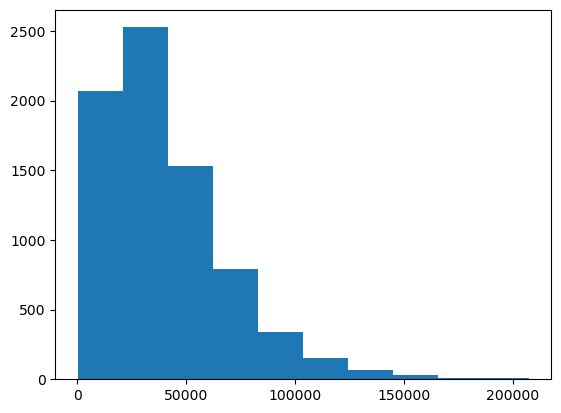

In [17]:
# Visualizes null values for 'Income' variable

plt.hist(df['Income'])
plt.show()

In [18]:
# Histogram is skewed right for 'Income'; we will replace missing values with median

df['Income'].fillna(df['Income'].median(), inplace=True)

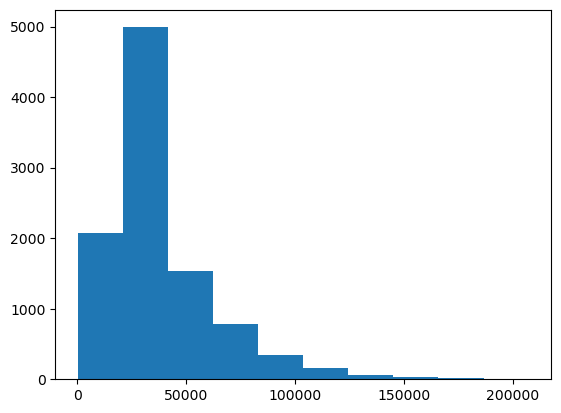

In [19]:
# Visualizes 'Income' following replacement of null values with median
# Distribution appears relatively similar, skewed right

plt.hist(df['Income'])
plt.show()

In [20]:
# We can appreciate that "Soft_drink" from our df.info() command carries an "object" type
# This command lists unique values

df['Soft_drink'].describe()

count     7533
unique       2
top         No
freq      5589
Name: Soft_drink, dtype: object

In [21]:
# This tells us the 2 attributes of "Soft_drink" are either Yes or No (excluding null values)

df['Soft_drink'], df['Soft_drink'].unique()


(0       NaN
 1        No
 2        No
 3        No
 4       Yes
        ... 
 9995     No
 9996     No
 9997    Yes
 9998     No
 9999     No
 Name: Soft_drink, Length: 10000, dtype: object,
 array([nan, 'No', 'Yes'], dtype=object))

In [22]:
# We can replicate the "Soft_drink" variable and re-express objects as a dictionary function

df['Soft_drink_numeric'] = df['Soft_drink']

In [23]:
# Creating the dictionary

dict_drink = {"Soft_drink_numeric": {'No':0, 'Yes':1, 'nan':'np.nan'}}

In [24]:
# Now we can replace our re-expressed duplicate Soft_drink variable

df.replace(dict_drink, inplace=True)

In [25]:
# This verifies that our variable type has been converted to a float

df['Soft_drink_numeric'].info(), df['Soft_drink_numeric'].unique()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Soft_drink_numeric
Non-Null Count  Dtype  
--------------  -----  
7533 non-null   float64
dtypes: float64(1)
memory usage: 78.3 KB


(None, array([nan,  0.,  1.]))

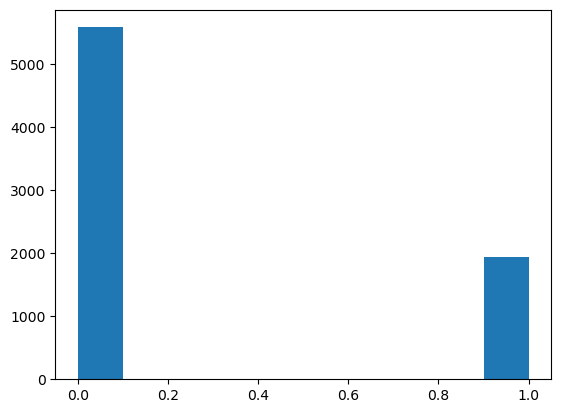

In [26]:
# Visualizes 'Soft_drink_numeric' after re-expression

plt.hist(df['Soft_drink_numeric'])
plt.show()

In [27]:
# Replaces categorical null values with the mode and are associated with our '0' locator

df['Soft_drink_numeric'] = df['Soft_drink_numeric'].fillna(df['Soft_drink_numeric'].mode()[0])

In [28]:
# Determines if all of our null values have been filled; this should be equal to 10000

df['Soft_drink_numeric'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Soft_drink_numeric
Non-Null Count  Dtype  
--------------  -----  
10000 non-null  float64
dtypes: float64(1)
memory usage: 78.3 KB


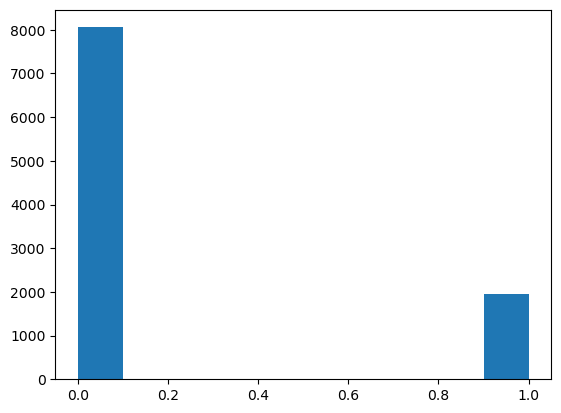

In [29]:
# Visualizes 'Income' following replacement of null values with mode
# Distribution appears relatively similar, still containing only 2 values

plt.hist(df['Soft_drink_numeric'])
plt.show()

In [30]:
# Replaces categorical null values with the mode and are associated with our '0' locator

df['Overweight'] = df['Overweight'].fillna(df['Overweight'].mode()[0])

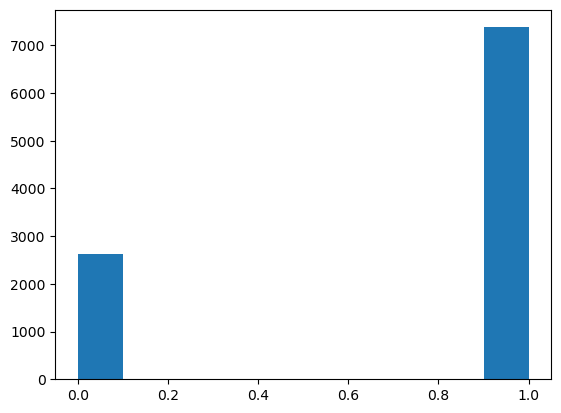

In [31]:
# Visualizes null values for 'Overweight' variable
# This variable also appears to be categorical, though already exists as a float type

plt.hist(df['Overweight'])
plt.show()

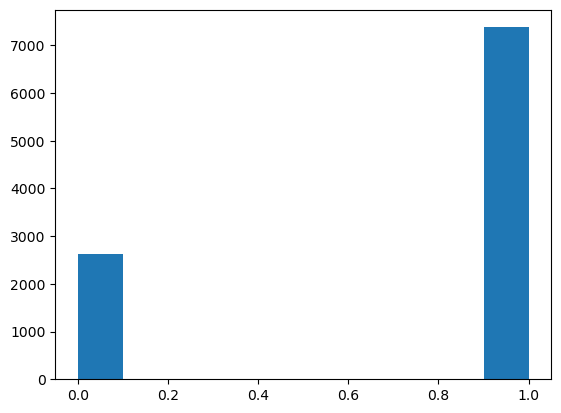

In [32]:
# This confirms our mode increased to reflect filling of null/0 values

plt.hist(df['Overweight'])
plt.show()

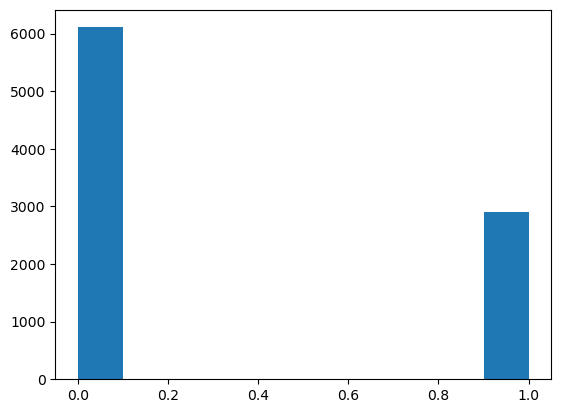

In [33]:
# The same is true of anxiey; we can repeat the process

plt.hist(df['Anxiety'])
plt.show()

In [34]:
# This variable is categorical and we can replace null values with the mode

df['Anxiety'] = df['Anxiety'].fillna(df['Anxiety'].mode()[0])

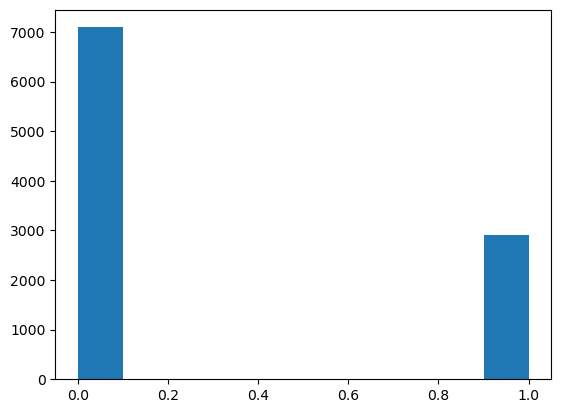

In [35]:
# Our distribution appears similar

plt.hist(df['Anxiety'])
plt.show()

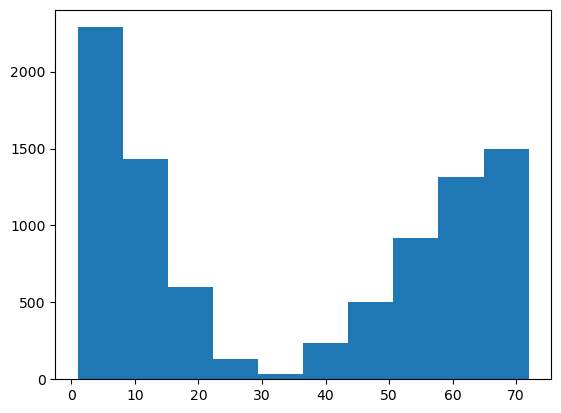

In [36]:
# Here we see asymmetrical bimodal distrubution

plt.hist(df['Initial_days'])
plt.show()

In [37]:
# We will impute the median in our next step
# First, we should understand the distribution of our data as increasing median values may change the distribution of our data

df['Initial_days'].describe()

count    8944.000000
mean       34.432082
std        26.287050
min         1.001981
25%         7.911709
50%        34.446941
75%        61.124654
max        71.981486
Name: Initial_days, dtype: float64

In [38]:
# We will use median as our method of univariate imputation as this is less sensitive to outliers

df['Initial_days'].fillna(df['Initial_days'].median(), inplace=True)

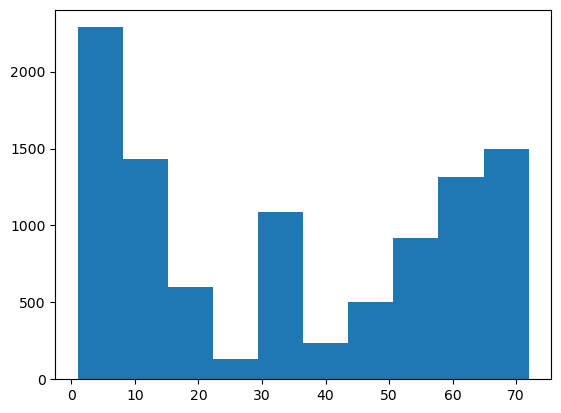

In [39]:
# We have 1056 missing values to assign the median value
# Our histogram remains bimodal and asymmetric

plt.hist(df['Initial_days'])
plt.show()

In [40]:
# Descibes distribution of the data following imputation

df['Initial_days'].describe()

count    10000.000000
mean        34.433651
std         24.860232
min          1.001981
25%          8.928987
50%         34.446941
75%         59.459981
max         71.981486
Name: Initial_days, dtype: float64

In [41]:
# Finally, we can see that all of our missing values have been filled
# At index 27, our original 'Soft_drink' variable is present as we have duplicated it, re-expressed data from "object" to "floatt", and re appropriately filled missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 54 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10000 non-null  int64  
 1   CaseOrder           10000 non-null  int64  
 2   Customer_id         10000 non-null  object 
 3   Interaction         10000 non-null  object 
 4   UID                 10000 non-null  object 
 5   City                10000 non-null  object 
 6   State               10000 non-null  object 
 7   County              10000 non-null  object 
 8   Zip                 10000 non-null  int64  
 9   Lat                 10000 non-null  float64
 10  Lng                 10000 non-null  float64
 11  Population          10000 non-null  int64  
 12  Area                10000 non-null  object 
 13  Timezone            10000 non-null  object 
 14  Job                 10000 non-null  object 
 15  Children            10000 non-null  float64
 16  Age  

In [42]:
# We need to identify all of our quantitative variables to detect outliers
# These include: Children, Age, Income, VitD_levels, Doc_visits, Full_meals_eaten, VitD_supp, Initial_days, TotalCharge, and Additional_charges
# We can create a new z-score column for each corresponding variable

In [43]:
# Creates a z-score chart for Children

df['Z_Score_Children']=stats.zscore(df['Children'])

In [44]:
# Views the variable alongside the new corresponding z-score

df[['Children', 'Z_Score_Children']].head

<bound method NDFrame.head of       Children  Z_Score_Children
0          1.0         -0.424650
1          3.0          0.618716
2          3.0          0.618716
3          0.0         -0.946333
4          1.0         -0.424650
...        ...               ...
9995       1.0         -0.424650
9996       4.0          1.140399
9997       3.0          0.618716
9998       3.0          0.618716
9999       8.0          3.227130

[10000 rows x 2 columns]>

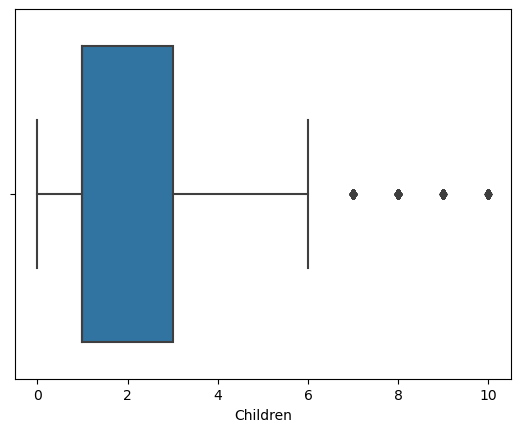

In [45]:
# Creates a box plot to view outliers
# Outliers here will be retained, as having 10 children is not unreasonable

boxplot=sns.boxplot(x='Children',data=df)

In [46]:
# Creates a z-score chart for Age

df['Z_Score_Age']=stats.zscore(df['Age'])

In [47]:
# Views the variable alongside the new corresponding z-score

df[['Age', 'Z_Score_Age']].head

<bound method NDFrame.head of             Age   Z_Score_Age
0     53.000000 -1.643333e-02
1     51.000000 -1.275909e-01
2     53.000000 -1.643333e-02
3     78.000000  1.373036e+00
4     22.000000 -1.739376e+00
...         ...           ...
9995  25.000000 -1.572639e+00
9996  87.000000  1.873245e+00
9997  53.295676  3.949110e-16
9998  43.000000 -5.722212e-01
9999  53.295676  3.949110e-16

[10000 rows x 2 columns]>

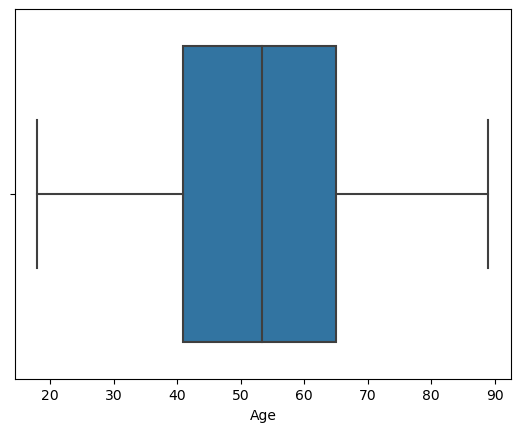

In [48]:
# Creates a box plot to view outliers
# Outliers here will be retained as our age group of roughly 20-90 seems reasonable

boxplot=sns.boxplot(x='Age',data=df)

In [49]:
# Creates a z-score chart for Income

df['Z_Score_Income']=stats.zscore(df['Income'])

In [50]:
# Views the variable alongside the new corresponding z-score

df[['Income', 'Z_Score_Income']].head

<bound method NDFrame.head of         Income  Z_Score_Income
0     86575.93        1.904974
1     46805.99        0.316815
2     14370.14       -0.978466
3     39741.49        0.034704
4      1209.56       -1.504016
...        ...             ...
9995  45967.61        0.283336
9996  14983.02       -0.953992
9997  65917.81        1.080020
9998  29702.32       -0.366197
9999  62682.63        0.950827

[10000 rows x 2 columns]>

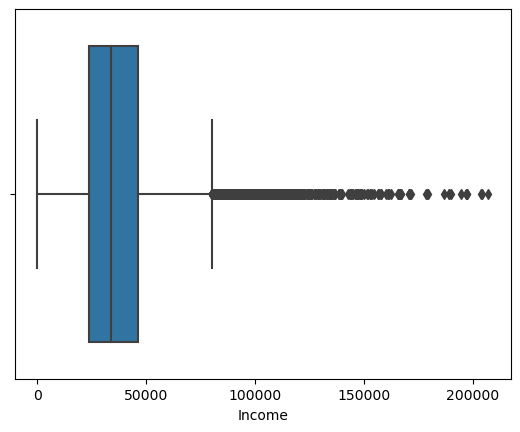

In [51]:
# Creates a box plot to view outliers
# Outliers here will be retained as our range of $0 to > $200,000 is reasonable

boxplot=sns.boxplot(x='Income',data=df)

In [52]:
# Creates a z-score chart for Vitamin D levels

df['Z_Score_VitD_levels']=stats.zscore(df['VitD_levels'])

In [53]:
# Views the variable alongside the new corresponding z-score

df[['VitD_levels', 'Z_Score_VitD_levels']].head

<bound method NDFrame.head of       VitD_levels  Z_Score_VitD_levels
0       17.802330            -0.239530
1       18.994640            -0.062181
2       17.415889            -0.297011
3       17.420079            -0.296388
4       16.870524            -0.378131
...           ...                  ...
9995    16.481612            -0.435979
9996    18.451601            -0.142954
9997    15.752751            -0.544393
9998    21.956305             0.378351
9999    20.421883             0.150114

[10000 rows x 2 columns]>

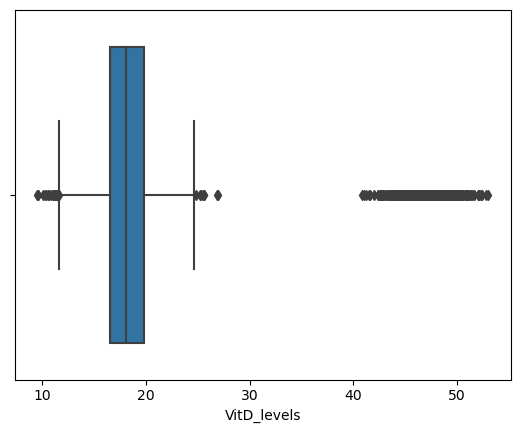

In [54]:
# Creates a box plot to view outliers
# These values will be retained as values they are reasonably within normal limits

boxplot=sns.boxplot(x='VitD_levels',data=df)

In [55]:
# Creates a z-score chart for Doc Visits

df['Z_Score_Doc_visits']=stats.zscore(df['Doc_visits'])

In [56]:
# Views the variable alongside the new corresponding z-score

df[['Doc_visits', 'Z_Score_Doc_visits']].head

<bound method NDFrame.head of       Doc_visits  Z_Score_Doc_visits
0              6            0.944647
1              4           -0.967981
2              4           -0.967981
3              4           -0.967981
4              5           -0.011667
...          ...                 ...
9995           4           -0.967981
9996           5           -0.011667
9997           4           -0.967981
9998           5           -0.011667
9999           5           -0.011667

[10000 rows x 2 columns]>

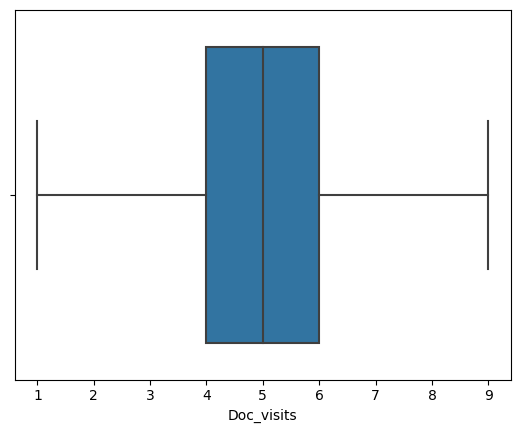

In [57]:
# Creates a box plot to view outliers
# These values will be retained as it is not unusual for a doctor to visit a patient regulary during a hospital admission

boxplot=sns.boxplot(x='Doc_visits',data=df)

In [58]:
# Creates a z-score chart for Full meals eaten

df['Z_Score_Full_meals_eaten']=stats.zscore(df['Full_meals_eaten'])

In [59]:
# Views the variable alongside the new corresponding z-score

df[['Full_meals_eaten', 'Z_Score_Full_meals_eaten']].head

<bound method NDFrame.head of       Full_meals_eaten  Z_Score_Full_meals_eaten
0                    0                 -0.993387
1                    2                  0.990609
2                    1                 -0.001389
3                    1                 -0.001389
4                    0                 -0.993387
...                ...                       ...
9995                 2                  0.990609
9996                 0                 -0.993387
9997                 2                  0.990609
9998                 2                  0.990609
9999                 0                 -0.993387

[10000 rows x 2 columns]>

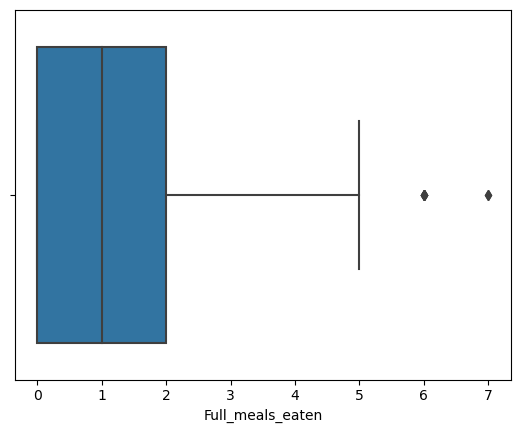

In [60]:
# Creates a box plot to view outliers
# These values will be retained as some patients (ex, gastric bypass patients) may not tolerate large meals

boxplot=sns.boxplot(x='Full_meals_eaten',data=df)

In [61]:
# Creates a z-score chart for Vitamin D supplementation

df['Z_Score_VitD_supp']=stats.zscore(df['VitD_supp'])

In [62]:
# Views the variable alongside the new corresponding z-score

df[['VitD_supp', 'Z_Score_VitD_supp']].head

<bound method NDFrame.head of       VitD_supp  Z_Score_VitD_supp
0             0          -0.634713
1             1           0.956445
2             0          -0.634713
3             0          -0.634713
4             2           2.547602
...         ...                ...
9995          1           0.956445
9996          0          -0.634713
9997          0          -0.634713
9998          1           0.956445
9999          1           0.956445

[10000 rows x 2 columns]>

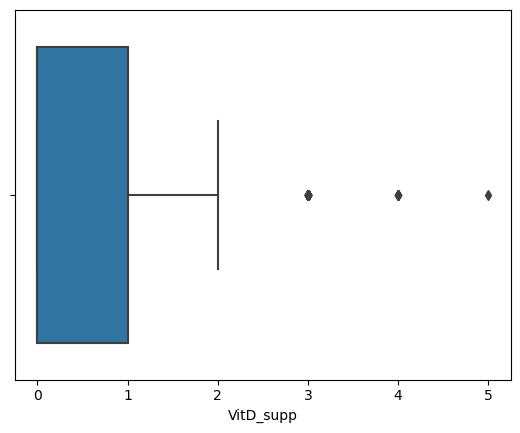

In [63]:
# Creates a box plot to view outliers
# These values will be retained as 5 instances of vitamin D supplementation during a hospital admission is reasonable

boxplot=sns.boxplot(x='VitD_supp',data=df)

In [64]:
# Creates a z-score chart for Initial days

df['Z_Score_Initial_days']=stats.zscore(df['Initial_days'])

In [65]:
# Views the variable alongside the new corresponding z-score

df[['Initial_days', 'Z_Score_Initial_days']].head

<bound method NDFrame.head of       Initial_days  Z_Score_Initial_days
0        10.585770             -0.959326
1        15.129562             -0.776544
2         4.772177             -1.193189
3         1.714879             -1.316175
4         1.254807             -1.334682
...            ...                   ...
9995     51.561217              0.688989
9996     68.668237              1.377151
9997     34.446941              0.000535
9998     63.356903              1.163493
9999     70.850592              1.464941

[10000 rows x 2 columns]>

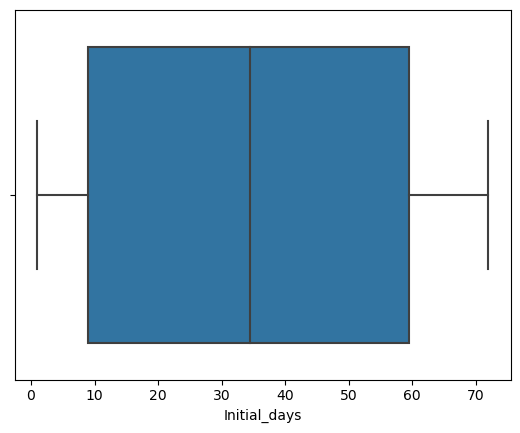

In [66]:
# Creates a box plot to view outliers
# No outliers exist in this visualization

boxplot=sns.boxplot(x='Initial_days',data=df)

In [67]:
# Creates a z-score chart for total charges

df['Z_Score_TotalCharge']=stats.zscore(df['TotalCharge'])

In [68]:
# Views the variable alongside the new corresponding z-score

df[['TotalCharge', 'Z_Score_TotalCharge']].head

<bound method NDFrame.head of       TotalCharge  Z_Score_TotalCharge
0     3191.048774            -0.799579
1     4214.905346            -0.496429
2     2177.586768            -1.099652
3     2465.118965            -1.014517
4     1885.655137            -1.186089
...           ...                  ...
9995  6651.241294             0.224938
9996  7851.522660             0.580325
9997  7725.953391             0.543146
9998  8462.831883             0.761326
9999  8700.856021             0.831802

[10000 rows x 2 columns]>

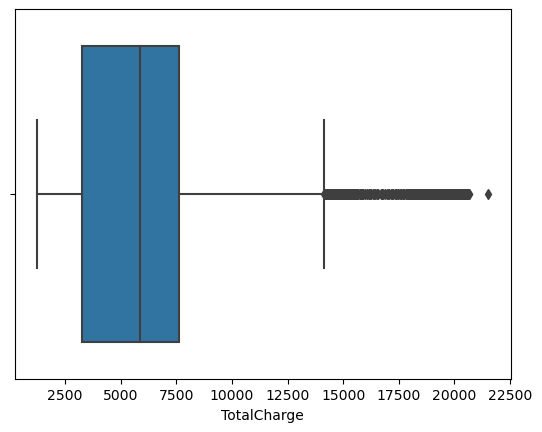

In [69]:
# Creates a box plot to view outliers
# Outliers here will be retained as charges are likely to increase with length of stay and treatment of copmlications

boxplot=sns.boxplot(x='TotalCharge',data=df)

In [70]:
# Creates a z-score chart for additional charges

df['Z_Score_Additional_charges']=stats.zscore(df['Additional_charges'])

In [71]:
# Views the variable alongside the new corresponding z-score

df[['Additional_charges', 'Z_Score_Additional_charges']].head

<bound method NDFrame.head of       Additional_charges  Z_Score_Additional_charges
0           17939.403420                    0.765005
1           17612.998120                    0.715114
2           17505.192460                    0.698635
3           12993.437350                    0.009004
4            3716.525786                   -1.408991
...                  ...                         ...
9995         8927.642189                   -0.612461
9996        28507.147340                    2.380307
9997        15281.214660                    0.358696
9998         7781.678412                   -0.787624
9999        11643.189930                   -0.197384

[10000 rows x 2 columns]>

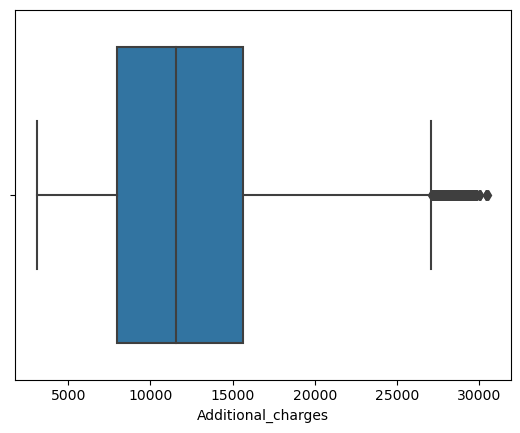

In [72]:
# Creates a box plot to view outliers
# We can retain outliers here as medical complexity and complications may warrant more extensive (and costly) care

boxplot=sns.boxplot(x='Additional_charges',data=df)